In [1]:
import matplotlib.pyplot as pl
import matplotlib.colors as colors

import xarray as xr
import numpy as np
import cartopy.crs as ccrs

import helpers as hlp
from spatial_tools import Projection

In [2]:
"""
Read LES results.
"""
path = '/home/scratch1/bart/microhh/papers/dust_mahrooz_dirk/v1/large/'

# Read default statistics for basestate density.
ds1_les_def = hlp.xr_read_all(f'{path}/20220511/valthermond.default.0000000.nc', ['thermo'])
ds2_les_def = hlp.xr_read_all(f'{path}/20220515/valthermond.default.0000000.nc', ['thermo'])
ds3_les_def = hlp.xr_read_all(f'{path}/20220623/valthermond.default.0000000.nc', ['thermo'])

# Read cross-sections.
ds1_s0 = xr.open_dataset(f'{path}/20220511/0-2um.xy.nc', decode_times=False)
ds1_s1 = xr.open_dataset(f'{path}/20220511/2-10um.xy.nc', decode_times=False)
ds1_s2 = xr.open_dataset(f'{path}/20220511/10-20um.xy.nc', decode_times=False)
ds1_s3 = xr.open_dataset(f'{path}/20220511/20-58um.xy.nc', decode_times=False)
ds1_s4 = xr.open_dataset(f'{path}/20220511/58-83um.xy.nc', decode_times=False)

ds2_s0 = xr.open_dataset(f'{path}/20220515/0-2um.xy.nc', decode_times=False)
ds2_s1 = xr.open_dataset(f'{path}/20220515/2-10um.xy.nc', decode_times=False)
ds2_s2 = xr.open_dataset(f'{path}/20220515/10-20um.xy.nc', decode_times=False)
ds2_s3 = xr.open_dataset(f'{path}/20220515/20-58um.xy.nc', decode_times=False)
ds2_s4 = xr.open_dataset(f'{path}/20220515/58-83um.xy.nc', decode_times=False)

ds3_s0 = xr.open_dataset(f'{path}/20220623/0-2um.xy.nc', decode_times=False)
ds3_s1 = xr.open_dataset(f'{path}/20220623/2-10um.xy.nc', decode_times=False)
ds3_s2 = xr.open_dataset(f'{path}/20220623/10-20um.xy.nc', decode_times=False)
ds3_s3 = xr.open_dataset(f'{path}/20220623/20-58um.xy.nc', decode_times=False)
ds3_s4 = xr.open_dataset(f'{path}/20220623/58-83um.xy.nc', decode_times=False)

In [3]:
"""
Spatial projection used by LES.
"""

central_lon = 6.9350000000000005
central_lat = 52.87333325

proj = Projection(
        xsize = 38400,
        ysize = 38400,
        itot = 768,
        jtot = 768,
        lon = central_lon,
        lat = central_lat,
        anchor = 'center')

margin = 0.01
extent = [proj.lon.min()-margin, proj.lon.max()+margin, proj.lat.min()-margin, proj.lat.max()+margin]

In [4]:
"""
Scaling factors, copied from `emission_scale_factor.ipynb`.
- The base units for scalars in MicroHH are kg(dust) / kg(air).
- For all sizes, we use a surface flux of 1 kg m s-1 or 1 kg m-2 s-1, emitted only from the test field.
- These scaling factors scale the MicroHH quantities from kg m-3 to ug m-3,
  i.e. the conversion from kg kg-1 to kg m-3 has to be done separately. 
"""

f1 = np.array([ 0.98156916, 2.24236087, 4.38834721, 17.82482515, 29.04712242])
f2 = np.array([ 546954.45187662, 1229770.49243494, 2302754.73961623, 10306679.56421122, 36822115.23165021])
f3 = np.array([4.44038076e-02, 1.51387274e-01, 1.08206917e+00, 2.97905763e+01, 2.23369041e+02])

In [5]:
"""
Gravitational settling velocities.
Following: https://sci-hub.se/10.1063/1.5022089
"""
dust_diameter = np.array([1, 6, 15, 39, 70.5, 261.5]) * 1e-6
rho_p = 1500   # Density particles [kg m-3]
rho_a = 1.225  # Reference density air [kg m-3]
nu = 1e-5      # Kinematic viscosity air [m2 s-1]
g = 9.81       # Gravitational acceleration [m s-2]
w_gravi = -dust_diameter**2 * rho_p / (18 * nu * rho_a) * g

In [6]:
"""
Calculate statistics.
Surface deposition is simply the gravitational settling velocity at the lowest gridpoint times the concentration.
"""

dt = float(ds1_s1.time[1] - ds1_s1.time[0])

depo_1_s0 = ds1_s0['0-2um'  ][:,0,:,:].sum(dim='time') * ds1_les_def.rhoref[0] * f1[0] * w_gravi[0] * dt 
depo_1_s1 = ds1_s1['2-10um' ][:,0,:,:].sum(dim='time') * ds1_les_def.rhoref[0] * f1[1] * w_gravi[1] * dt 
depo_1_s2 = ds1_s2['10-20um'][:,0,:,:].sum(dim='time') * ds1_les_def.rhoref[0] * f1[2] * w_gravi[2] * dt 
depo_1_s3 = ds1_s3['20-58um'][:,0,:,:].sum(dim='time') * ds1_les_def.rhoref[0] * f1[3] * w_gravi[3] * dt 
depo_1_s4 = ds1_s4['58-83um'][:,0,:,:].sum(dim='time') * ds1_les_def.rhoref[0] * f1[4] * w_gravi[4] * dt 

depo_3_s0 = ds3_s0['0-2um'  ][:,0,:,:].sum(dim='time') * ds3_les_def.rhoref[0] * f3[0] * w_gravi[0] * dt
depo_3_s1 = ds3_s1['2-10um' ][:,0,:,:].sum(dim='time') * ds3_les_def.rhoref[0] * f3[1] * w_gravi[1] * dt
depo_3_s2 = ds3_s2['10-20um'][:,0,:,:].sum(dim='time') * ds3_les_def.rhoref[0] * f3[2] * w_gravi[2] * dt
depo_3_s3 = ds3_s3['20-58um'][:,0,:,:].sum(dim='time') * ds3_les_def.rhoref[0] * f3[3] * w_gravi[3] * dt
depo_3_s4 = ds3_s4['58-83um'][:,0,:,:].sum(dim='time') * ds3_les_def.rhoref[0] * f3[4] * w_gravi[4] * dt

Text(0, 0.5, '24 h total deposition ($\\mu g$ $m^{-2}$)')

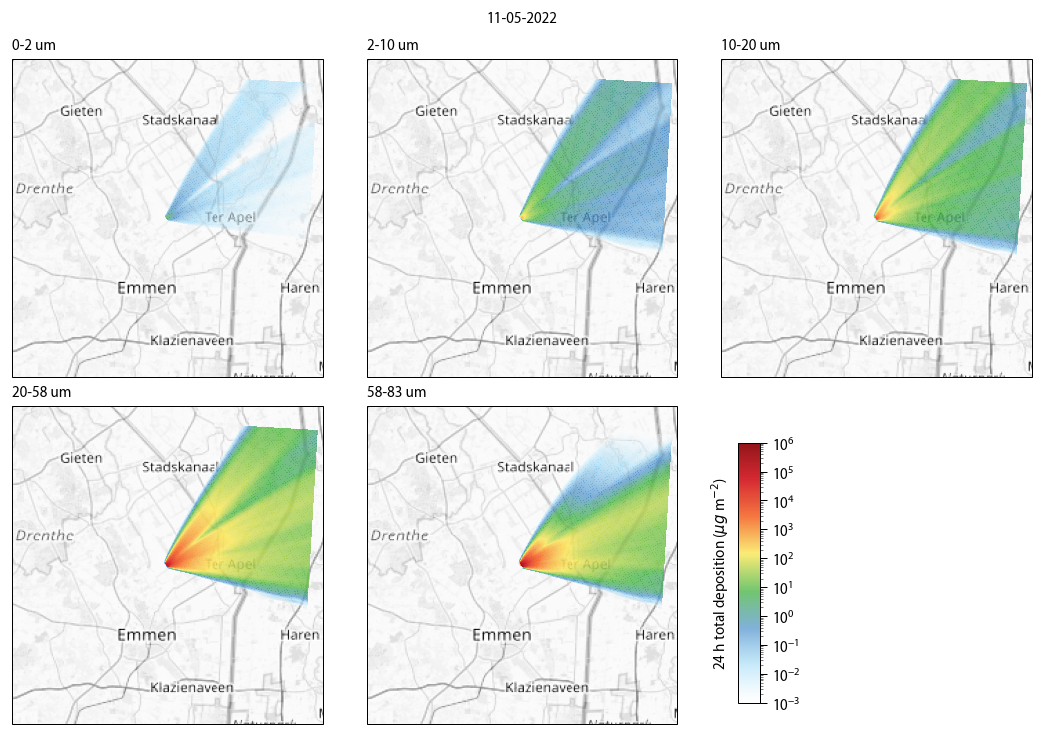

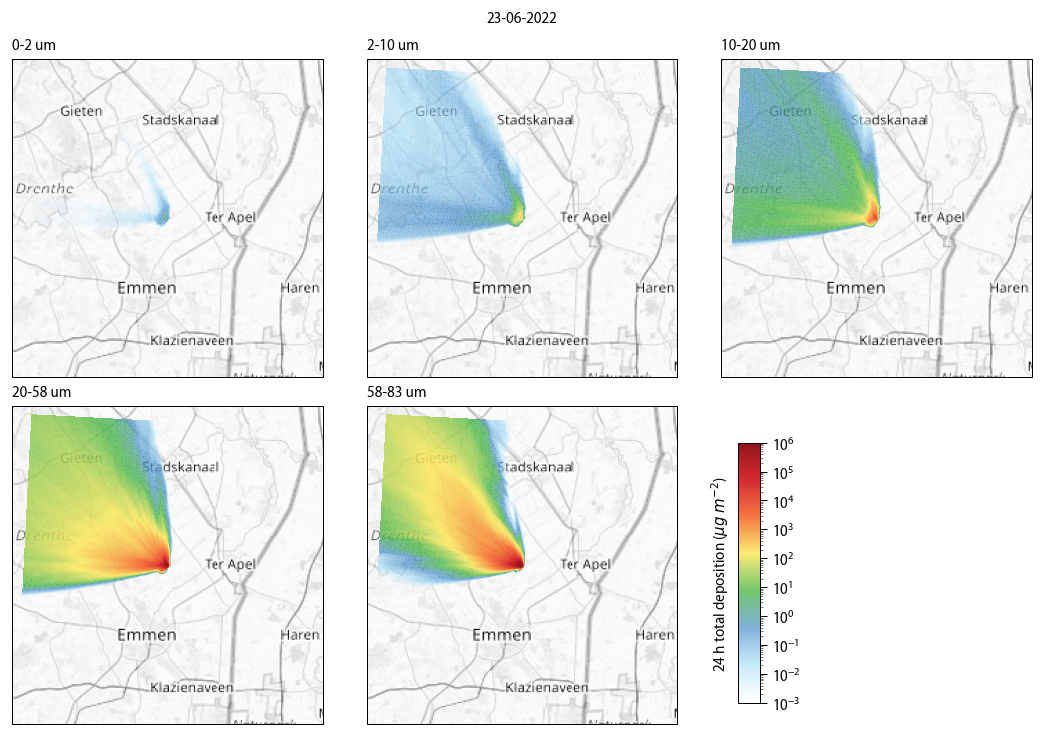

In [7]:
"""
Plot deposition maps.
"""
cmap = hlp.get_cmap_wbyr()
cmapa = hlp.add_transparancy_to_cmap(cmap, p=0.3)
norm = colors.LogNorm(vmin=1e-3, vmax=1e6)

fig=pl.figure(figsize=(9, 6.2))
pl.suptitle('11-05-2022')

ax = hlp.setup_map(extent, sp=231, zoom_level=9, use_osm=True)
pl.title('0-2 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_1_s0, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=232, zoom_level=9, use_osm=True)
pl.title('2-10 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_1_s1, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=233, zoom_level=9, use_osm=True)
pl.title('10-20 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_1_s2, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=234, zoom_level=9, use_osm=True)
pl.title('20-58 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_1_s3, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=235, zoom_level=9, use_osm=True)
pl.title('58-83 um', loc='left')
pc=pl.pcolormesh(proj.lon, proj.lat, -depo_1_s4, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

pl.tight_layout()

cax = fig.add_axes([0.7, 0.05, 0.02, 0.35])
cb = pl.colorbar(pc, cax=cax)
cb.ax.yaxis.set_label_position('left')
cb.ax.set_ylabel(r'24 h total deposition ($\mu g$ m$^{-2}$)', rotation=90)


fig=pl.figure(figsize=(9, 6.2))
pl.suptitle('23-06-2022')

ax = hlp.setup_map(extent, sp=231, zoom_level=9, use_osm=True)
pl.title('0-2 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_3_s0, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=232, zoom_level=9, use_osm=True)
pl.title('2-10 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_3_s1, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=233, zoom_level=9, use_osm=True)
pl.title('10-20 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_3_s2, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=234, zoom_level=9, use_osm=True)
pl.title('20-58 um', loc='left')
pl.pcolormesh(proj.lon, proj.lat, -depo_3_s3, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

ax = hlp.setup_map(extent, sp=235, zoom_level=9, use_osm=True)
pl.title('58-83 um', loc='left')
pc=pl.pcolormesh(proj.lon, proj.lat, -depo_3_s4, cmap=cmapa, norm=norm, transform=ccrs.PlateCarree())

pl.tight_layout()

cax = fig.add_axes([0.7, 0.05, 0.02, 0.35])
cb = pl.colorbar(pc, cax=cax)
cb.ax.yaxis.set_label_position('left')
cb.ax.set_ylabel(r'24 h total deposition ($\mu g$ $m^{-2}$)', rotation=90)